Domain – Retail

Focus – Visualize the sales data

Business challenge/requirement
BigMart is one of the biggest retailers in Europe and has operations across multiple countries. You are a data 
analyst in the IT team of BigMart. Invoice and SKU wise sales data for the Year 2011 is shared with you. You need 
to prepare meaningful charts to showcase the various sales trends for 2011 to top management.

Key issues
Data should be displayed pictorially to capture the attention of top management.

Considerations
NONE

Data volume
Approx. 500K records – file BigMartSalesData.csv

Additional information
NA

Business benefits
This exercise is an annual exercise and BigMart makes an important investment decision based on trends.

Approach to Solve
You must use the fundamentals of Matplotlib covered in module 5 and plot the following four charts/graph:
1. Plot total sales per month for the Year 2011. How have the total sales increased over the months in the Year 
2011? Which month has the lowest sales?
2. Plot a Pie Chart for the Year 2011 Country Wise. Which Country contributes highest towards sales?
3. Plot Scatter Plot for the invoice amounts and see the concentration of amount. In which range have most of the 
invoice amounts concentrated?

Enhancements for code
You can try the following enhancements in code:
1. In Pie Chart, shadow=true, startangle=90 and see how different the chart looks
2. In the Scatter Plot, change the color of Scatter Points

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

df =  pd.read_csv('/Users/vels/Desktop/MyPy/00_Assignment/Datasets/BigMartSalesData.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Amount,InvoiceDate,Day,Month,Year,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,01-12-10,1,12,2010,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,01-12-10,1,12,2010,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom


In [2]:
# Filtering rows with 'Year' equal to 2011

df_2011 = df[df['Year'] == 2011]
df_2011

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Amount,InvoiceDate,Day,Month,Year,CustomerID,Country
42479,539993,22386,JUMBO BAG PINK POLKADOT,10,1.95,19.50,04-01-11,4,1,2011,13313.0,United Kingdom
42480,539993,21499,BLUE POLKADOT WRAP,25,0.42,10.50,04-01-11,4,1,2011,13313.0,United Kingdom
42481,539993,21498,RED RETROSPOT WRAP,25,0.42,10.50,04-01-11,4,1,2011,13313.0,United Kingdom
42482,539993,22379,RECYCLING BAG RETROSPOT,5,2.10,10.50,04-01-11,4,1,2011,13313.0,United Kingdom
42483,539993,20718,RED RETROSPOT SHOPPER BAG,10,1.25,12.50,04-01-11,4,1,2011,13313.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...
541869,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,10.20,09-12-11,9,12,2011,12680.0,France
541870,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12.60,09-12-11,9,12,2011,12680.0,France
541871,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,16.60,09-12-11,9,12,2011,12680.0,France
541872,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,16.60,09-12-11,9,12,2011,12680.0,France


In [3]:
df_2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499395 entries, 42479 to 541873
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    499395 non-null  object 
 1   StockCode    499395 non-null  object 
 2   Description  498068 non-null  object 
 3   Quantity     499395 non-null  int64  
 4   UnitPrice    499395 non-null  float64
 5   Amount       499395 non-null  float64
 6   InvoiceDate  499395 non-null  object 
 7   Day          499395 non-null  int64  
 8   Month        499395 non-null  int64  
 9   Year         499395 non-null  int64  
 10  CustomerID   379979 non-null  float64
 11  Country      499395 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 49.5+ MB


In [4]:
monthly_sales = df_2011.drop(['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','Day','Year','CustomerID','Country'],axis=1)
monthly_sales

,Amount,Month
42479,19.50,1
42480,10.50,1
42481,10.50,1
42482,10.50,1
42483,12.50,1
...,...,...
541869,10.20,12
541870,12.60,12
541871,16.60,12
541872,16.60,12


In [5]:
#df_2011.describe(include='all')

In [6]:
# Grouping data based on month

monthly_sales['count'] = monthly_sales.groupby('Month')['Amount'].transform('count')

# Removing duplicates

monthly_sales.drop_duplicates('Month',inplace=True)
monthly_sales.sort_values(by='count',ascending=True,inplace=True)

monthly_sales.drop(['Amount'], axis=1)

,Month,count
516350,12,25524
77623,2,27704
142074,4,29912
42479,1,35144
285397,8,35276
105327,3,36747
209012,6,36868
171986,5,37026
245880,7,39517
320673,9,50225


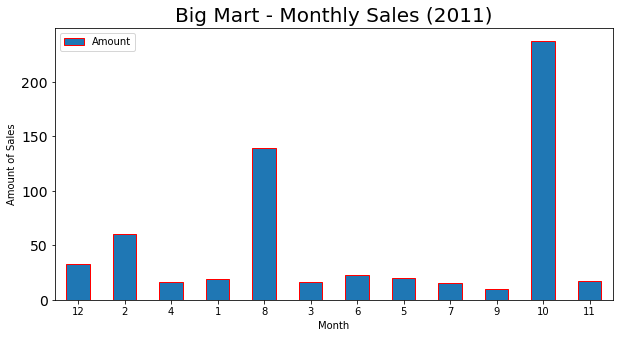

In [7]:
month = monthly_sales['Month'].values
amount = monthly_sales['count'].values

monthly_sales.plot.bar(x='Month',y='Amount', rot=0, figsize=(10, 5), edgecolor='red')
#monthly_sales.plot.bar(x='Month',y='count',color='green', marker='o', linestyle='-',
#     linewidth=2, markersize=6, label='Amount')
# Change the font size and lable to show veritical

#plt.errorbar(x, y, fmt='ro', label="data",ecolor='black')

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 14)

plt.xlabel("Month", fontsize=10)
plt.ylabel("Amount of Sales", fontsize = 10)
plt.title("Big Mart - Monthly Sales (2011)", fontsize = 20)
plt.show()

In [8]:
# Get the column names:

for col in df_2011.columns:
    print(col)

InvoiceNo
StockCode
Description
Quantity
UnitPrice
Amount
InvoiceDate
Day
Month
Year
CustomerID
Country


In [9]:
country_sales = df_2011.drop(['InvoiceNo','StockCode','Description','Quantity','UnitPrice','InvoiceDate',
                              'Day','Month','Year','CustomerID'],axis=1)
country_sales

,Amount,Country
42479,19.50,United Kingdom
42480,10.50,United Kingdom
42481,10.50,United Kingdom
42482,10.50,United Kingdom
42483,12.50,United Kingdom
...,...,...
541869,10.20,France
541870,12.60,France
541871,16.60,France
541872,16.60,France


In [10]:
# Grouping data based on month

country_sales['count'] = country_sales.groupby('Country')['Amount'].transform('count')

# Removing duplicates

country_sales.drop_duplicates('Country',inplace=True)
country_sales.sort_values(by='count',ascending=True,inplace=True)

df1 = country_sales.drop(['Amount'], axis=1)
country_sales.drop(['Amount'], axis=1)

,Country,count
100802,Saudi Arabia,10
44150,Bahrain,18
103590,Czech Republic,30
157289,Brazil,32
72980,Lebanon,45
395439,RSA,58
168136,European Community,61
89565,United Arab Emirates,68
217667,Malta,127
69002,Greece,146


In [12]:
# Filter for countries with small sales

temp = df1.groupby('Country').filter(lambda x: x['count'] < 5000)

temp = [{'Country': 'Other Countries','count': temp['count'].sum()}]
other_countries = pd.DataFrame(temp, index=['50000'])
other_countries

,Country,count
50000,Other Countries,19234


In [13]:
# Filter for countries with small sales

big_countries = df1.groupby('Country').filter(lambda x: x['count'] > 5000)

big_countries

,Country,count
44292,EIRE,7793
43854,France,8118
44203,Germany,8930
42479,United Kingdom,455320


In [15]:
df_pie = big_countries.append(other_countries, sort=False)
df_pie


/var/folders/0p/yw5z5ccs6q58bgccdkh2rwt40000gn/T/ipykernel_43237/1925411043.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pie = big_countries.append(other_countries, sort=False)


,Country,count
44292,EIRE,7793
43854,France,8118
44203,Germany,8930
42479,United Kingdom,455320
50000,Other Countries,19234


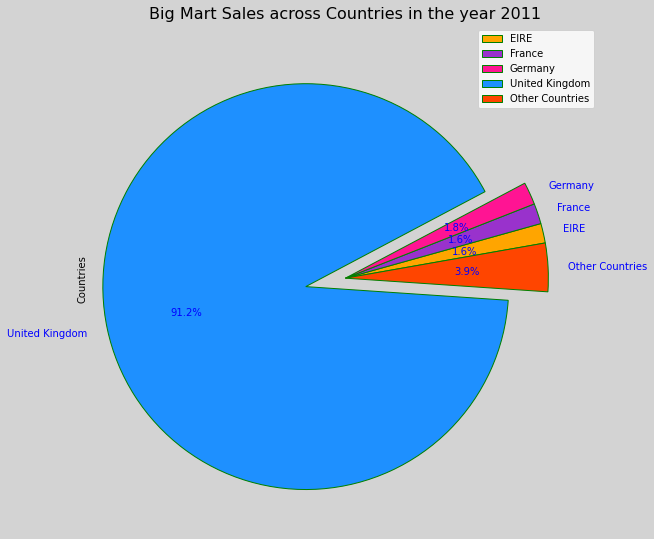

In [19]:
fig = plt.figure(figsize=(20,20))
ax1 = plt.subplot(121, aspect='equal')
fig.patch.set_facecolor('lightgray')

myexplode = (0, 0, 0, 0.2,0)
colors= ('orange','darkorchid','deeppink','dodgerblue','orangered')

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

df_pie.plot(kind='pie', y = 'count', ax=ax1,startangle=10, shadow=False, labels=df_pie['Country'], 
        legend = False, fontsize=10, colors=colors, wedgeprops = wp,
        explode = myexplode,autopct ='%1.1f%%',textprops = dict(color ="b"))

plt.ylabel("Countries")
plt.title('Big Mart Sales across Countries in the year 2011', fontsize=16)
plt.legend()
plt.show();


In [78]:
# Dropping off columns other than "Amount" and "Stock Code"

stock = df.drop(['InvoiceNo','Month','Description','Quantity','UnitPrice','InvoiceDate','Day','Year','CustomerID','Country'], axis=1)
stock

,StockCode,Amount
0,85123A,15.30
1,71053,20.34
2,84406B,22.00
3,84029G,20.34
4,84029E,20.34
...,...,...
541869,22613,10.20
541870,22899,12.60
541871,23254,16.60
541872,23255,16.60


In [79]:
# Grouping data based on 'StockCode'

stock['count'] = stock.groupby('StockCode')['Amount'].transform('count')

# Removing duplicates

stock.drop_duplicates('StockCode',inplace=True)
stock.sort_values(by='count',ascending=True,inplace=True)

df_stock = stock.drop(['Amount'], axis=1)
df_stock

,StockCode,count
37048,90142A,1
75234,84509F,1
272055,84797B,1
149036,46037A,1
150138,84251J,1
...,...,...
93,20725,1639
5535,47566,1727
177,85099B,2159
880,22423,2203


In [80]:
# Filtering stocks that had more demand

mr_demand = df_stock.groupby('StockCode').filter(lambda x: x['count'] >= 600)
mr_demand

,StockCode,count
57,82483,603
1236,84692,603
245,21889,607
20,48187,608
177692,23200,609
...,...,...
93,20725,1639
5535,47566,1727
177,85099B,2159
880,22423,2203


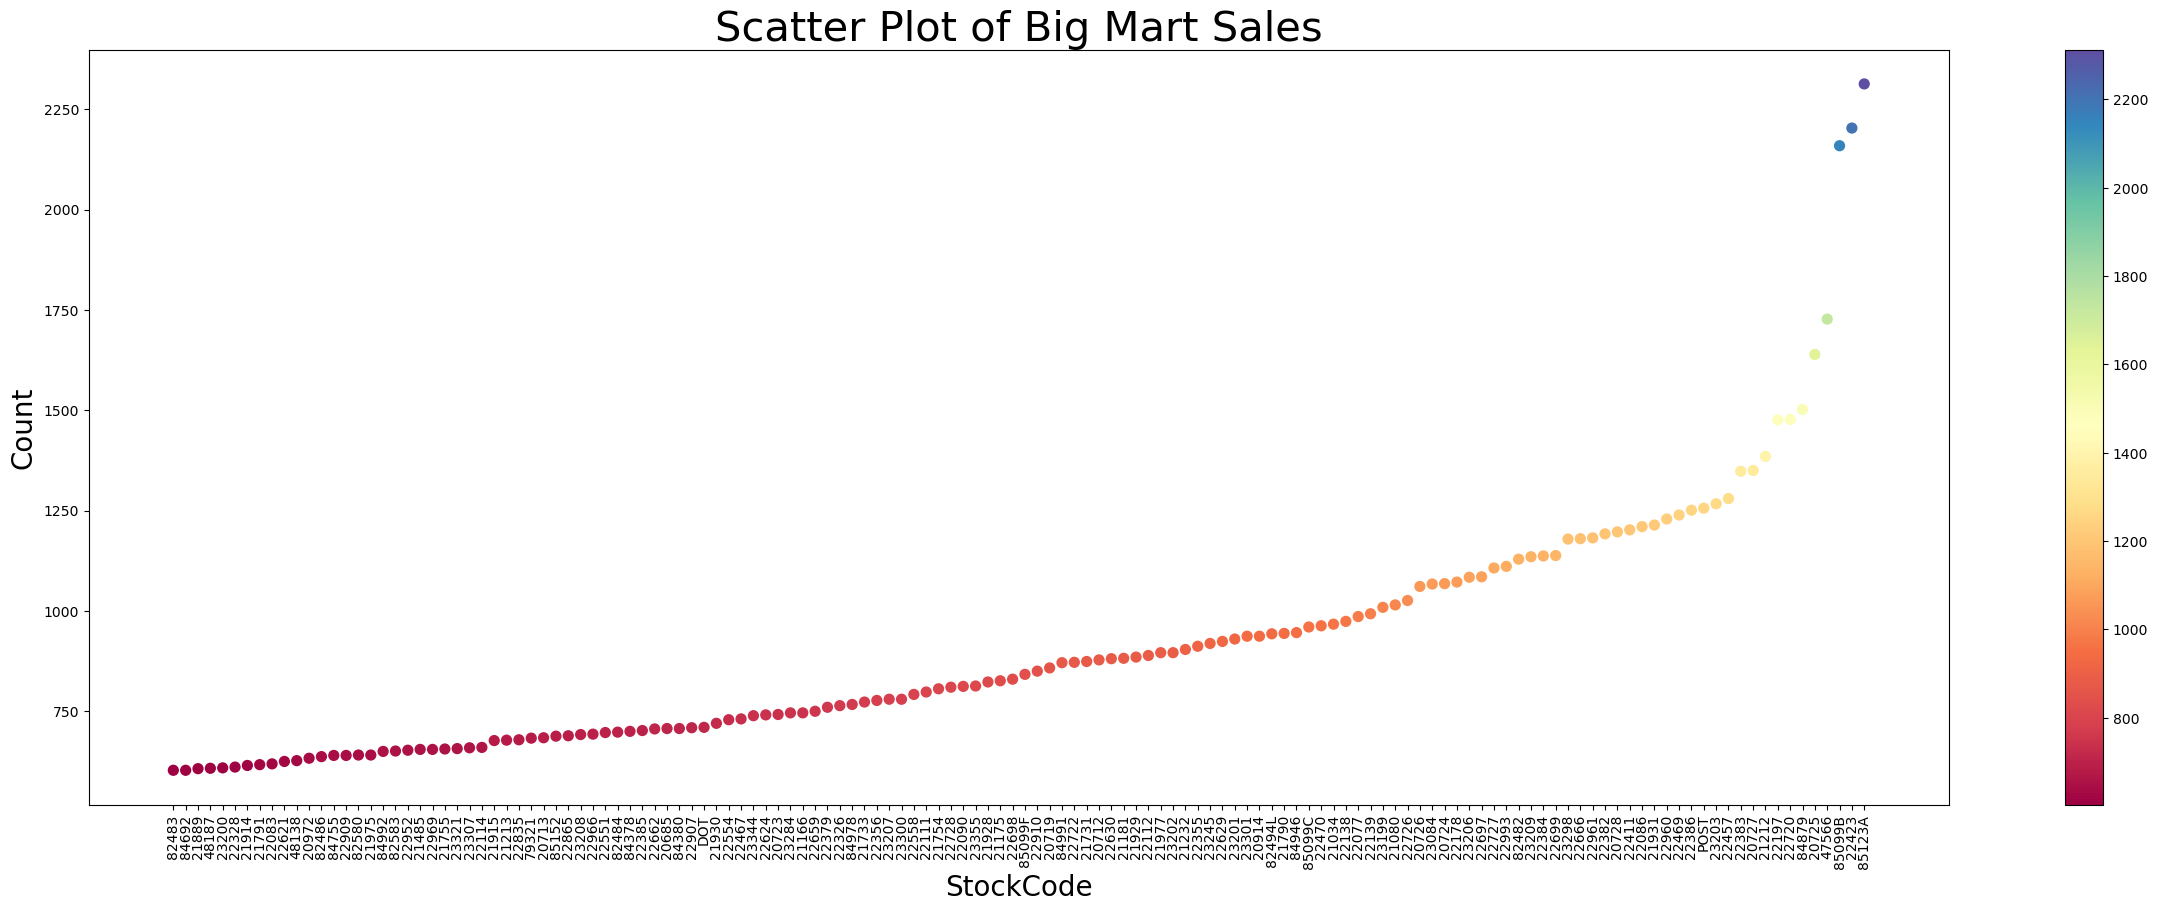

In [81]:
# Plotting a Scatter Plot to find the range where most of the invoice amounts are concentrated.

StockCode = mr_demand['StockCode'].values
count = mr_demand['count'].values


plt.rcParams.update({'figure.figsize':(30,10), 'figure.dpi':100})
plt.scatter(StockCode, count, c=count, cmap='Spectral', s=50)
plt.colorbar()

plt.xlabel('StockCode', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize = 10,rotation=90)
plt.title('Scatter Plot of Big Mart Sales', fontsize=30)
plt.show()